In [23]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import patches

In [24]:
raw_data = np.random.randint(0, 255, (3,100))

In [25]:
network_dimensions = np.array([5,5])
n_iterations = 10000
init_learning_rate = 0.01

normalize_data = True
normalize_by_column = False

In [27]:
m = raw_data.shape[0]
n = raw_data.shape[1]

init_radius = max(network_dimensions[0], network_dimensions[1]) / 2
time_constant = n_iterations / np.log(init_radius)

data = raw_data
if normalize_data:
    if normalize_by_column:
        col_maxes = raw_data.max(axis=0)
        data = raw_data / col_maxes[np.newaxis, :]
    else:
        data = raw_data / data.max()

In [28]:
net = np.random.random((network_dimensions[0], network_dimensions[1], m))

In [29]:
def find_bmu(t, net, m):
    bmu_idx = np.array([0,0])
    min_dist = np.iinfo(np.int).max
    for x in range(net.shape[1]):
        for y in range(net.shape[1]):
            w = net[x, y, :].reshape(m, 1)
            sq_dist = np.sum((w- t) **2)
            if sq_dist < min_dist:
                min_dist = sq_dist
                bmu_idx = np.array([x, y])
    bmu = net[bmu_idx[0], bmu_idx[1], :].reshape(m, 1)
    return (bmu, bmu_idx)

In [32]:
def decay_radius(intial_radius, i, time_constraint):
    return intial_radius * np.exp(-i / time_constant)

def decay_learning_rate(initial_learning_rate, i, n_iterations):
    return initial_learning_rate * np.exp(-i / n_iterations)

def calculate_influence(distance, radius):
    return np.exp(-distance / (2* (radius**2)))

In [39]:
# SOM learning

for i in range(10000):
    t = data[:, np.random.randint(0, n)].reshape(np.array([m, 1]))
    
    bmu, bmu_idx = find_bmu(t, net, m)
    
    r = decay_radius(init_radius, i, time_constant)
    l = decay_learning_rate(init_learning_rate, i, n_iterations)
    
    for x in range(net.shape[0]):
        for y in range(net.shape[1]):
            w = net[x, y, :].reshape(m, 1)
            w_dist = np.sum((np.array([x, y]) - bmu_idx) **2)
            if w_dist <= r**2:
                influence = calculate_influence(w_dist, r)
                new_w = w + (l * influence * (t - w))
                net[x, y, :] = new_w.reshape(1,3)

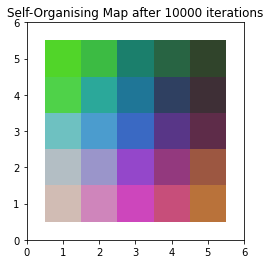

In [40]:
fig = plt.figure()
# setup axes
ax = fig.add_subplot(111, aspect='equal')
ax.set_xlim((0, net.shape[0]+1))
ax.set_ylim((0, net.shape[1]+1))
ax.set_title('Self-Organising Map after %d iterations' % n_iterations)

# plot the rectangles
for x in range(1, net.shape[0] + 1):
    for y in range(1, net.shape[1] + 1):
        ax.add_patch(patches.Rectangle((x-0.5, y-0.5), 1, 1,
                     facecolor=net[x-1,y-1,:],
                     edgecolor='none'))
plt.show()